# Data Exploration and Preprocessing Notebook

In [11]:
import json
import regex
from datetime import datetime, timezone

## 1- Extracting relevant data

The set of keys that we will consider in our sentiment analysis task are the following:
- `selftext`: the text of the post, will contain nuances of the sentiment
- `title`: the title of the post often refers to the asset or the topic of the post
- `created` or `created_utc`: is the date of creation of the post

We removed submissions that had `[deleted]` or `[removed]` in either their text or title. <br>
This means that the post was moderated and we cannot use it for our analysis. <br>

In [3]:
# create a new json file with data that only contains the above keys
data = []
with open("Data/wallstreetbets_submissions", "r") as f:
    for line in f:
        d = json.loads(line)
        # check if the title or text contains the string "[removed]"
        if "[removed]" not in d['title'] and "[removed]" not in d['selftext'] and "[deleted]" not in d['title'] and "[deleted]" not in d['selftext']:
            data.append(
                {
                    'date': d['created_utc'] if 'created_utc' in d else d['created'],
                    'title': d['title'],
                    'text': d['selftext'],
                }
            )

There are **822004** such submissions that we will further preprocess in order to perform sentiment analysis.<br>
These submissions are going to aliment our sentiment analysis model.

In [4]:
len(data)

822004

The cleaned data file can be found under `Data/wallstreetbets_submissions_cleaned.json`

In [5]:
# write the data to a new file in a well formatted way
with open("Data/wallstreetbets_submissions_cleaned.json", "w") as f:
    json.dump(data, f, indent=4)

## 2- SPY Data

Now we are going to check how many submissions are related to the S&P 500 ETF (SPY).<br>
For this we will be looking for the keywords:
- `SPY`
- `SP500`
- `S&P500`
- `S&P 500`
- `S&P`
- `Standard & Poor's`
- `Standard and Poor's`
- `Standard and Poor 500`
- `Standard & Poor 500`
- `Standard and Poor 500`
- `Standard & Poor`
- `Standard and Poor`
- `Standard and Poor's 500`
- `Standard & Poor's 500`
- `Standard and Poor's 500`
in the title and the text <br>
We will be using regexes to find these keywords in an optimized way.

In [4]:
# create a list of regexes that match the words in the above list
words = ["SPY", "SP500", "S&P500", "S&P 500", "S&P", "Standard & Poor's", 
         "Standard and Poor's", "Standard and Poor 500", "Standard & Poor 500", 
         "Standard and Poor 500", "Standard & Poor", "Standard and Poor", 
         "Standard and Poor's 500", "Standard & Poor's 500", "Standard and Poor's 500"
         ]

# create a regex pattern that matches any of the words in the above list
pattern = regex.compile(r'\b(?:' + '|'.join(words) + r')\b', regex.IGNORECASE)

In [5]:
spy_data = []

with open("Data/wallstreetbets_submissions_cleaned.json", "r") as f:
    data = json.load(f)
    for d in data:
        if pattern.search(d['title']) or pattern.search(d['text']):
            spy_data.append(d)

The data related to SPY can be found under `Data/wallstreetbets_submissions_SPY.json`

In [7]:
with open("Data/wallstreetbets_submissions_spy.json", "w") as f:
    json.dump(spy_data, f, indent=4)

To have an idea on the period that is spanned by the data related to SPY, we will plot the number of submissions per day.

In [25]:
date_count = {}
utc_zone = timezone.utc

for d in spy_data:
    date = datetime.fromtimestamp(int(d['date']), tz=utc_zone)
    if date in date_count:
        date_count[date] += 1
    else:
        date_count[date] = 1

In [27]:
set(date_count.values())

{1, 2}

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict

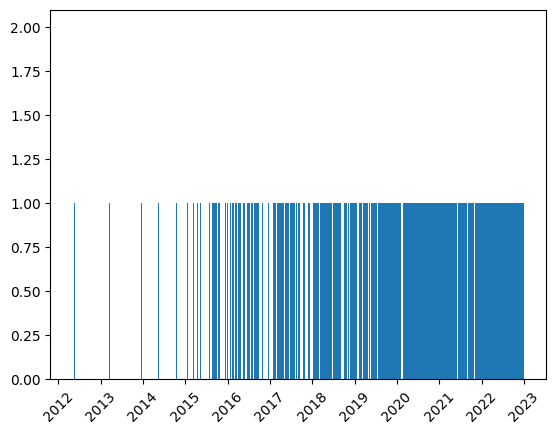

In [29]:
# plot the date counts as a bar plot with dates on the x-axis and counts on the y-axis
# the y-axis should be a count hence integers and only show years in the x-axis


date_count_1 = OrderedDict(sorted(date_count.items()))

fig, ax = plt.subplots()
ax.bar(date_count_1.keys(), date_count_1.values())
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()


From the above study, we can see that there is at most 2 submissions per day related to SPY. <br>
This is not enough data per day to base our trading strategy on. <br>
Therefore, we will have to change our strategy and either look for another asset or try to use all data at <br> our disposal to get a feel for the overall sentiment of the subreddit on the market.